In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist=tf.keras.datasets.mnist

In [5]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels.shape

(60000,)

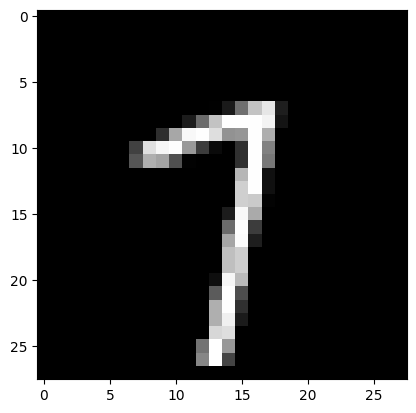

In [10]:
plt.imshow(train_images[42],cmap="gray")

In [11]:
np.set_printoptions(linewidth=200)
print(train_images[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230  30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 254 254 244  20   

In [12]:
#Normalizing the data
train_images=train_images/255.0
test_images=test_images/255.0

In [15]:
#Building the classifier
#defining custom callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):

#stop training on reaching 99% accuracy
    if(logs.get('accuracy')>=0.99):
      print("Reached 99% accuarcy so cancelling training!")
      self.model.stop_training=True

callbacks=myCallback()



model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 44s 22ms/step - loss: 0.1777 - accuracy: 0.9456
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0789 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0562 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0401 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0308 - accuracy: 0.9901


In [16]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.0839 - accuracy: 0.9793


[0.08385340124368668, 0.9793000221252441]